In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cosa fare
- Assicurarsi della qualità dei dati:
    - Controllare che le variabili siano state importate correttamente
    - Controllare che non ci siano valori mancanti.
        - Gestire i valori mancanti con rimozione
        - Gestire i valori mancanti con imputazione
    - Controllare la consistenza dei dati (sono nel formato giusto)
    - Controllo duplicati
- Analisi Esplorativa
    - Macrodescrittive per le problematiche evidenti
    - Matrice di correlazione
        - evidenziare anomalie o risultati inaspettati
        - evidenziare variabili fortemente correlate che potrebbero causare collinearità
    - Distribuzione delle variabili
        - Grafico incrociato con pairplot di seabor
        - Visualizzare le distribuzioni in maniera dettagliata:
            - Violin plot
            - Histogram
            - Box plot
        - Approfondire su variabili più importanti
        - Analisi dettagliate per le variabili qualitative (studiare)

In [3]:
# Load the data
## Prima fare "pip install openpyxl"
path = "/home/lorenzo/projects/startup-success/data/AIDA Export Definitivo.xlsx"
aida = pd.read_excel(path, sheet_name="Risultati", engine="openpyxl")

In [4]:
aida.shape

(1818, 341)

In [5]:
#Elenco colonne
pd.set_option('display.max_columns', None)
print("\n\n".join(aida.columns.tolist()))

Unnamed: 0

Ragione sociale

BvD ID number

Codice fiscale

Partita IVA

Indirizzo sede legale - Codice postale

Sede operativa - Codice postale

Forma giuridica

Stato giuridico

Anno di costituzione

Fondazione

Ragione sociale precedente

Dato di cambiamento della ragione sociale

Data di chiusura ultimo bilancio

Ultimo modello di contabilità - Bilancio
Ultimo anno disp.

Procedura/Cessazione

Data di inizio procedura/cessazione

Data di chiusura della procedura

Score negatività
migl

Pregiudizievoli di conservatoria rilevati

Protesti rilevati

Profilo
Capitale e strumenti fin.
capitale sociale
migl

Profilo
Capitale e strumenti fin.
capitale versato
migl

Profilo
azionariato
capitale detenuto (EUR)

Profilo
azionariato
% cap

Profilo
attivita
oggetto sociale

Profilo
attivita
Attività svolta nella sede legale

Profilo
attivita
dato inizio attivita

Profilo
attivita
stato attivita

Data

Variazione attività

Data.1

Tipo di atto

Atto

Chiusura bilancio
Ultimo anno disp.

Chiusur

In [ ]:
# Index: first column
aida.set_index(aida.columns[0], inplace=True)

In [11]:
aida.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1818 entries, 1.0 to 1818.0
Columns: 340 entries, Ragione sociale to M&A deal
dtypes: datetime64[ns](8), float64(27), int64(9), object(296)
memory usage: 4.7+ MB


In [17]:
# Describe ALL columns
aida.describe()

,Codice fiscale,Partita IVA,Indirizzo sede legale - Codice postale,Sede operativa - Codice postale,Anno di costituzione,Fondazione,Data di chiusura ultimo bilancio,Data di chiusura della procedura,Pregiudizievoli di conservatoria rilevati,Protesti rilevati,Profilo\nattivita\noggetto sociale,Profilo\nattivita\nAttività svolta nella sede legale,Profilo\nattivita\ndato inizio attivita,Profilo\nattivita\nstato attivita,Data,Variazione attività,Data.1,Tipo di atto,Atto,Chiusura bilancio\nUltimo anno disp.,Chiusura bilancio\n2023,Chiusura bilancio\n2022,Chiusura bilancio\n2021,Chiusura bilancio\n2020,Ricavi delle vendite (Ultimo anno)\nmigl EUR\nUltimo anno disp.,Utile netto (Ultimo anno)\nmigl EUR\nUltimo anno disp.,Totale attività (Ultimo anno)\nmigl EUR\nUltimo anno disp.,Fatturato estimato (migl EUR),ATECO 2007\ncodice,NACE Rev. 2,"NAICS 2017, core code",Dimensione gruppo dei pari,Ricavi delle vendite\nmigl EUR\nUltimo anno disp.,Utile Netto\nmigl EUR\nUltimo anno disp.,Totale Attività\nmigl EUR\nUltimo anno disp.,TOTALE ATTIVO\nmigl EUR\nUltimo anno disp.,TOTALE PASSIVO\nmigl EUR\nUltimo anno disp.,Ricavi vendite e prestazioni\nmigl EUR\nUltimo anno disp.,RISULTATO OPERATIVO\nmigl EUR\nUltimo anno disp.,RISULTATO PRIMA DELLE IMPOSTE\nmigl EUR\nUltimo anno disp.,UTILE/PERDITA DI ESERCIZIO\nmigl EUR\nUltimo anno disp.,N° di azionisti presenti,Numero di partecipazioni disponibili,M&A deal
count,1.818000e+03,1.818000e+03,1818.000000,1517.000000,1818,0.0,1818,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1818,1755,1784,1728,1610,1818.000000,1818.000000,1818.000000,0.0,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,0.0
mean,6.314909e+09,6.246944e+09,35706.169967,35918.387607,2011-09-15 15:15:38.613861632,NaN,2023-12-12 16:19:00.594059264,2008-02-04 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-12 16:19:00.594059264,2023-12-29 00:07:23.076923136,2022-12-29 06:56:30.134529024,2021-12-29 16:16:40.000000256,2020-12-29 19:55:49.565217536,5035.017613,3.966776,7123.556612,NaN,554448.581958,5544.397140,4821.543454,4117.455996,5035.017613,3.966776,7123.556612,7123.556612,7123.556612,5035.017613,181.610377,119.005273,3.966776,12.302530,1.538504,NaN
min,4.071029e+07,4.071029e+07,12.000000,12.000000,1941-04-22 00:00:00,NaN,2017-12-31 00:00:00,1999-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-31 00:00:00,2023-04-30 00:00:00,2022-04-30 00:00:00,2021-04-30 00:00:00,2020-04-30 00:00:00,857.453000,-34136.451000,153.676000,NaN,11110.000000,111.000000,337.000000,0.000000,857.453000,-34136.451000,153.676000,153.676000,153.676000,857.453000,-35921.319000,-38101.208000,-34136.451000,0.000000,0.000000,NaN
25%,2.799510e+09,2.770760e+09,20121.000000,20099.000000,2008-01-08 18:00:00,NaN,2023-12-31 00:00:00,2004-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 00:00:00,2023-12-31 00:00:00,2022-12-31 00:00:00,2021-12-31 00:00:00,2020-12-31 00:00:00,1324.012000,-4.171000,1546.427500,NaN,463210.000000,4632.000000,4234.000000,852.000000,1324.012000,-4.171000,1546.427500,1546.427500,1546.427500,1324.012000,2.811000,-1.077000,-4.171000,2.000000,0.000000,NaN
50%,4.930156e+09,4.883491e+09,24052.000000,25020.000000,2015-03-19 00:00:00,NaN,2023-12-31 00:00:00,2006-09-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 00:00:00,2023-12-31 00:00:00,2022-12-31 00:00:00,2021-12-31 00:00:00,2020-12-31 00:00:00,2210.403500,56.931000,3093.384500,NaN,620100.000000,6201.000000,5415.000000,3474.000000,2210.403500,56.931000,3093.384500,3093.384500,3093.384500,2210.403500,113.104500,80.672000,56.931000,3.000000,1.000000,NaN
75%,9.722840e+09,9.721781e+09,56121.000000,56121.000000,2019-02-07 18:00:00,NaN,2023-12-31 00:00:00,2010-05-24 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 00:00:00,2023-12-31 00:00:00,2022-12-31 00:00:00,2021-12-31 00:00:00,2020-12-31 00:00

In [4]:
righe_null = aida[aida.isna().any(axis=1)]
righe_null.shape #Show dimension of the dataframe with null values

(1818, 341)

In [11]:
# Trova le colonne che contengono solo valori NaN
colonne_tutti_nan = aida.columns[aida.isna().all()].tolist()
# Trova le colonne che contengono solo valori NaN
colonne_tutti_nan = aida.columns[aida.isna().all()].tolist()
print(colonne_tutti_nan)

# Ordina tutte le colonne in base al numero di NaN e visualizza il numero di NaN
nan_counts = aida.isna().sum().sort_values(ascending=False)
print(nan_counts)

# Elimina le colonne che contengono solo valori NaN
aida.drop(columns=colonne_tutti_nan, inplace=True)

colonne_pochi_nan = aida.columns[aida.isna().sum()<200].tolist()
reduced_aida = aida[colonne_pochi_nan]




[]
Socio di un network                             1817
Data di chiusura della procedura                1814
DM\nLaurea                                      1811
Principali marchi                               1811
Alleanze strategiche                            1809
                                                ... 
TOTALE ATTIVO\nmigl EUR\n2022                      0
TOTALE ATTIVO\nmigl EUR\n2023                      0
TOTALE ATTIVO\nmigl EUR\nUltimo anno disp.         0
TOTALE ATTIVITA' FINANZIARIE\nmigl EUR\n2020       0
TOTALE PATRIMONIO NETTO\nmigl EUR\n2021            0
Length: 327, dtype: int64


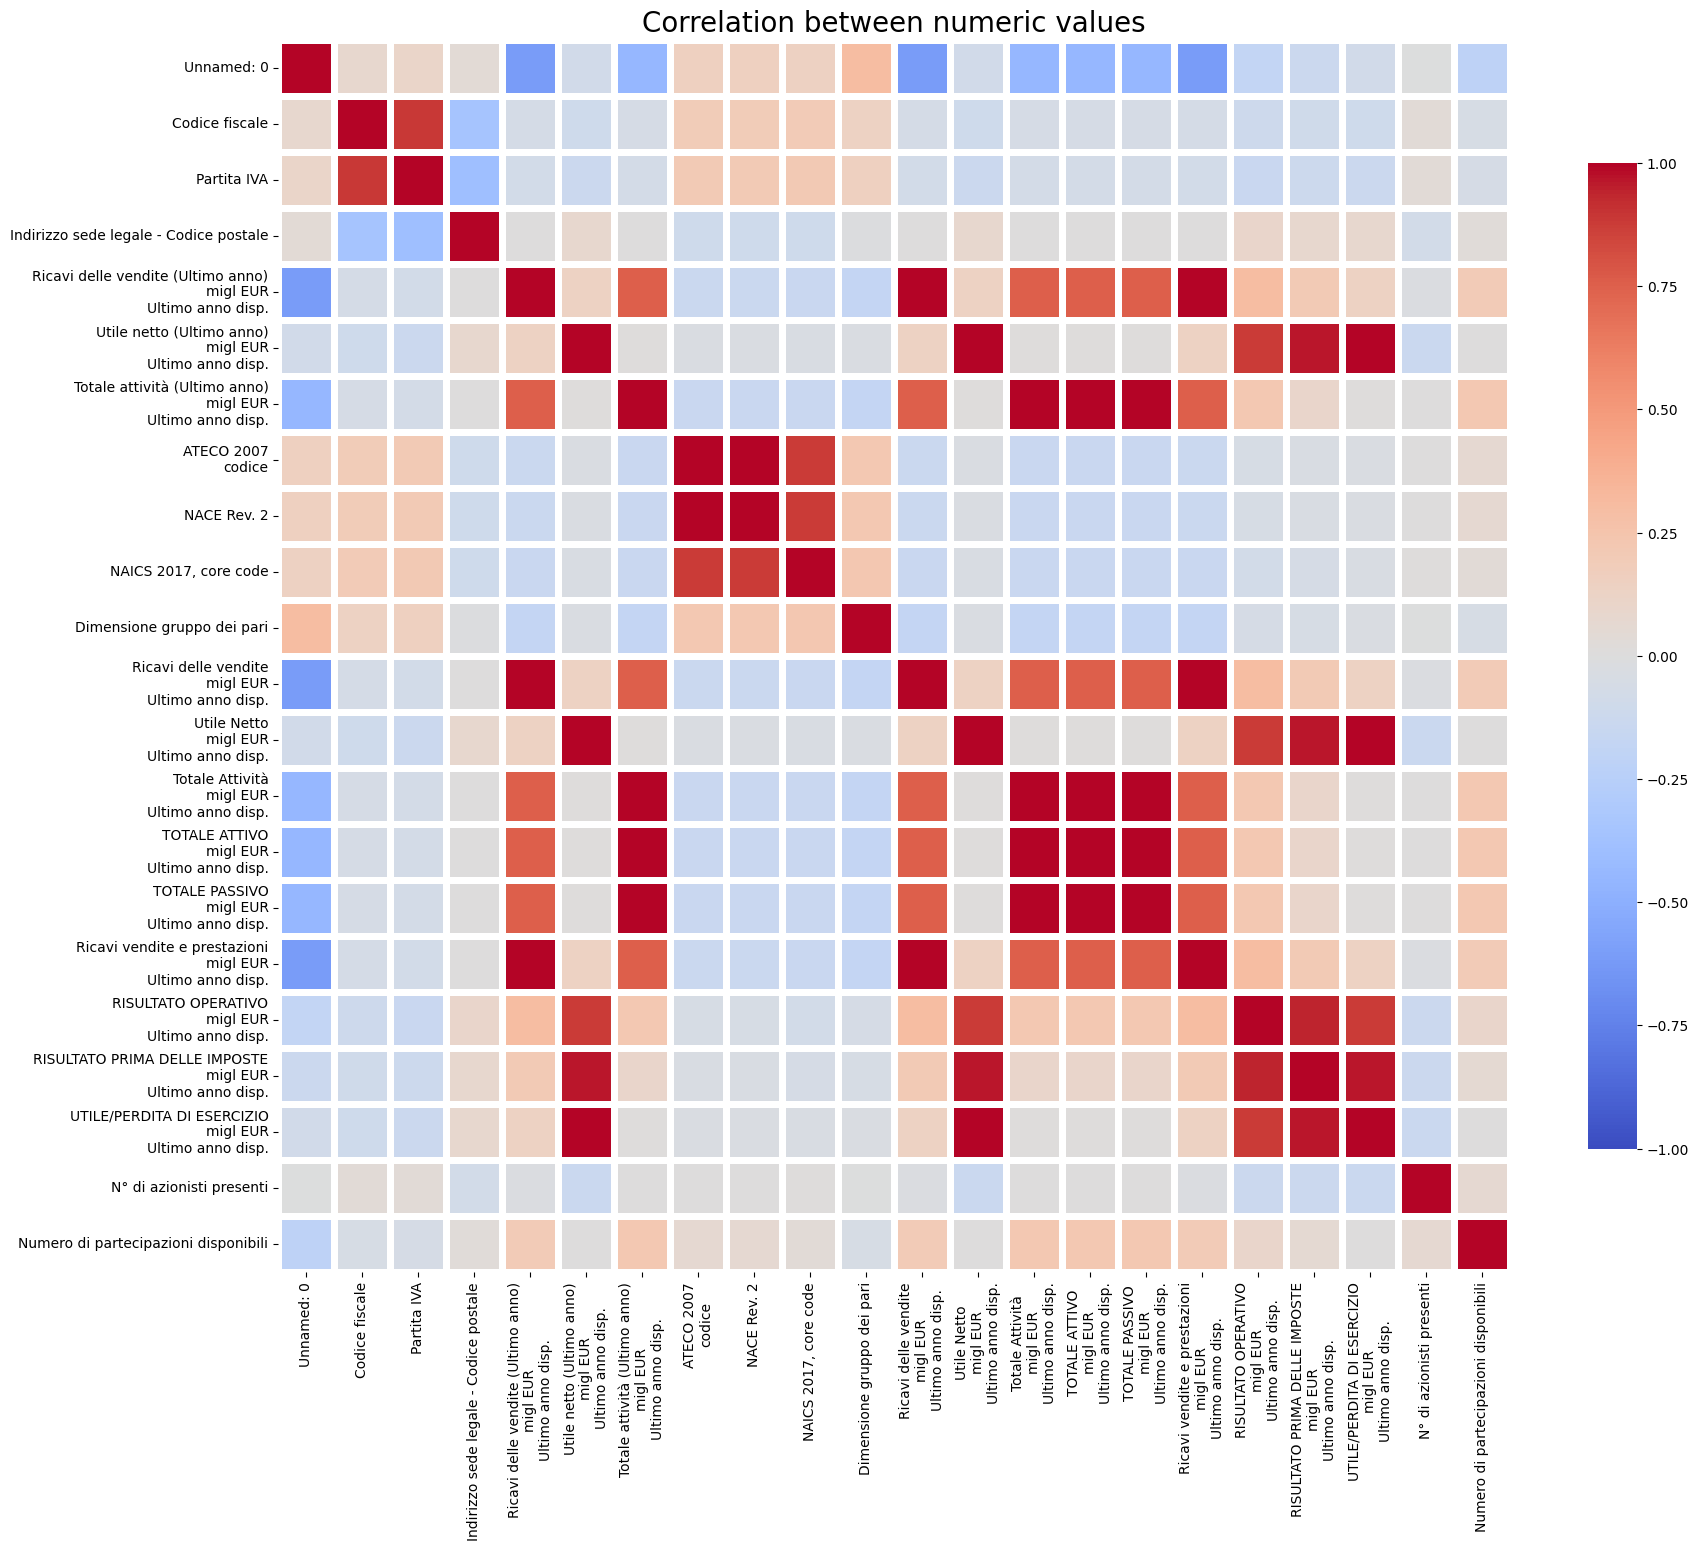

In [ ]:
# What is the correlation between the numeric values?
corr_matrix = reduced_aida.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(20,16))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    linewidths=5,
    linecolor="white",
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": 0.8, "orientation": "vertical"},  # Personalizza la barra dei colori
    square=True
)
plt.title("Correlation between numeric values", fontsize=20)
plt.show()



In [ ]:
# Variance inlation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

(array([298.,   3.,   0.,   1.,   6.,   3.,   2.,   0.,   3.,  25.]),
 array([   0. ,  181.8,  363.6,  545.4,  727.2,  909. , 1090.8, 1272.6,
        1454.4, 1636.2, 1818. ]),
 <BarContainer object of 10 artists>)

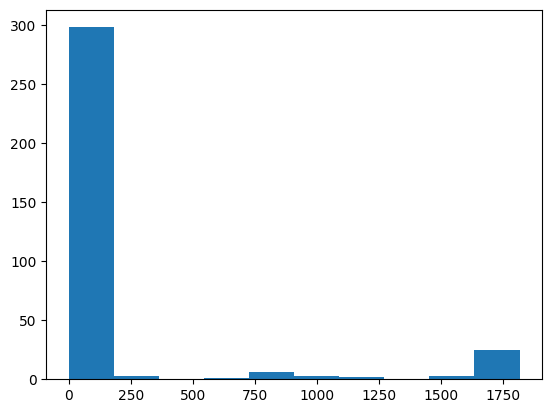

In [10]:
plt.hist(
    nan_counts
)

In [9]:
aida.shape

(1818, 327)

In [ ]:
# NaN values and creation of df "aida_filled" 

# Substitute NaN with the mean value in the numerical columns
aida_filled = aida.fillna({col: aida[col].mean() for col in aida.select_dtypes(include=['number']).columns})

# Substitute NaN with the mode value in the object columns
aida_filled = aida.fillna({col: aida[col].mode()[0] for col in aida.select_dtypes(include=['object']).columns})

# Stessa cosa da fare con Datetime 

# SECONDO ME INUTILE NEL NOSTRO CASO O FUORVIANTE


In [ ]:
# Description "aida_filled"
aida_filled.describe(include='all')

,Ragione sociale,BvD ID number,Codice fiscale,Partita IVA,Indirizzo sede legale - Codice postale,Sede operativa - Codice postale,Forma giuridica,Stato giuridico,Anno di costituzione,Fondazione,Ragione sociale precedente,Dato di cambiamento della ragione sociale,Data di chiusura ultimo bilancio,Ultimo modello di contabilità - Bilancio\nUltimo anno disp.,Procedura/Cessazione,Data di inizio procedura/cessazione,Data di chiusura della procedura,Score negatività\nmigl,Pregiudizievoli di conservatoria rilevati,Protesti rilevati,Profilo\nCapitale e strumenti fin.\ncapitale sociale\nmigl,Profilo\nCapitale e strumenti fin.\ncapitale versato\nmigl,Profilo\nazionariato\ncapitale detenuto (EUR),Profilo\nazionariato\n% cap,Profilo\nattivita\noggetto sociale,Profilo\nattivita\nAttività svolta nella sede legale,Profilo\nattivita\ndato inizio attivita,Profilo\nattivita\nstato attivita,Data,Variazione attività,Data.1,Tipo di atto,Atto,Chiusura bilancio\nUltimo anno disp.,Chiusura bilancio\n2023,Chiusura bilancio\n2022,Chiusura bilancio\n2021,Chiusura bilancio\n2020,Modello di contabilità\nUltimo anno disp.,Modello di contabilità\n2023,Modello di contabilità\n2022,Modello di contabilità\n2021,Modello di contabilità\n2020,Codice di consolidamento,Ricavi delle vendite (Ultimo anno)\nmigl EUR\nUltimo anno disp.,Utile netto (Ultimo anno)\nmigl EUR\nUltimo anno disp.,Totale attività (Ultimo anno)\nmigl EUR\nUltimo anno disp.,Dipendenti (Ultimo anno)\nUltimo anno disp.,Fatturato estimato (migl EUR),Capitale sociale (migl EUR),Capitalizzazione corrente\nmigl EUR,Indicatore d'Indipendenza BvD,Descrizione attività\n(IT),ATECO 2007\ncodice,NACE Rev. 2,"NAICS 2017, core code",US SIC codice,Nome gruppo dei pari,Descrizione gruppo dei pari,Dimensione gruppo dei pari,Overview completa,Storico,Linea di business principale,Principali prodotti e servizi,Stima dimensione,Alleanze strategiche,Socio di un network,Principali marchi,Clienti principali,Start-up innovativa,PMI innovativa,Società artigiana,Oggetto sociale,Ricavi delle vendite\nmigl EUR\nUltimo anno disp.,Ricavi delle vendite\nmigl EUR\n2023,Ricavi delle vendite\nmigl EUR\n2022,Ricavi delle vendite\nmigl EUR\n2021,Ricavi delle vendite\nmigl EUR\n2020,EBITDA\nmigl EUR\nUltimo anno disp.,EBITDA\nmigl EUR\n2023,EBITDA\nmigl EUR\n2022,EBITDA\nmigl EUR\n2021,EBITDA\nmigl EUR\n2020,Utile Netto\nmigl EUR\nUltimo anno disp.,Utile Netto\nmigl EUR\n2023,Utile Netto\nmigl EUR\n2022,Utile Netto\nmigl EUR\n2021,Utile Netto\nmigl EUR\n2020,Dipendenti\nUltimo anno disp.,Dipendenti\n2023,Dipendenti\n2022,Dipendenti\n2021,Dipendenti\n2020,Totale Attività\nmigl EUR\nUltimo anno disp.,Totale Attività\nmigl EUR\n2023,Totale Attività\nmigl EUR\n2022,Totale Attività\nmigl EUR\n2021,Totale Attività\nmigl EUR\n2020,Redditività delle vendite (ROS) \n%\nUltimo anno disp.,Redditività delle vendite (ROS) \n%\n2023,Redditività delle vendite (ROS) \n%\n2022,Redditività delle vendite (ROS) \n%\n2021,Redditività delle vendite (ROS) \n%\n2020,CREDITI VERSO SOCI\nmigl EUR\nUltimo anno disp.,CREDITI VERSO SOCI\nmigl EUR\n2023,CREDITI VERSO SOCI\nmigl EUR\n2022,CREDITI VERSO SOCI\nmigl EUR\n2021,CREDITI VERSO SOCI\nmigl EUR\n2020,TOTALE IMMOB. MATERIALI\nmigl EUR\nUltimo anno disp.,TOTALE IMMOB. MATERIALI\nmigl EUR\n2023,TOTALE IMMOB. MATERIALI\nmigl EUR\n2022,TOTALE IMMOB. MATERIALI\nmigl EUR\n2021,TOTALE IMMOB. MATERIALI\nmigl EUR\n2020,TOTALE IMMOB. IMMATERIALI\nmigl EUR\nUltimo anno disp.,TOTALE IMMOB. IMMATERIALI\nmigl EUR\n2023,TOTALE IMMOB. IMMATERIALI\nmigl EUR\n2022,TOTALE IMMOB. IMMATERIALI\nmigl EUR\n2021,TOTALE IMMOB. IMMATERIALI\nmigl EUR\n2020,TOTALE IMMOB. FINANZIARIE\nmigl EUR\nUltimo anno disp.,TOTALE IMMOB. FINANZIARIE\nmigl EUR\n2023,TOTALE IMMOB. FINANZIARIE\nmigl EUR\n2022,TOTALE IMMOB. FINANZIARIE\nmigl EUR\n2021,TOTALE IMMOB. FINANZIARIE\nmigl EUR\n2020,TOT CREDITI Imm. Fin.\nmigl EUR\nUltimo anno disp.,TOT CREDITI Imm. Fin.\nmigl EUR\n2023,TOT CREDITI Imm. Fin.\nmigl EUR\n2022,TOT CREDITI Imm. Fin.\nmigl EUR\n2021,